In [16]:
import plotly.express as px
import pandas as pd

import csa_data
import csa_constants

In [17]:
chat_data = csa_data.get_json_data(csa_constants.CHAT_DATA_FILE)

chat_df = pd.DataFrame(chat_data['messages'])[['id', 'date']]
chat_df['date'] = pd.to_datetime(chat_df['date'])

chat_df.head()

,id,date
0,1903819,2021-05-01 00:00:12
1,1903842,2021-05-01 00:01:13
2,1903855,2021-05-01 00:01:50
3,1903856,2021-05-01 00:02:05
4,1903857,2021-05-01 00:02:12


In [20]:
grouper = pd.Grouper(key='date', freq='1D')
chat_df_grouped = chat_df.groupby(grouper).count().reset_index()
chat_df_grouped.rename(columns={'id': 'count'}, inplace=True)

chat_df_grouped.head()

,date,count
0,2021-05-01,2340
1,2021-05-02,1812
2,2021-05-03,2356
3,2021-05-04,2849
4,2021-05-05,2608


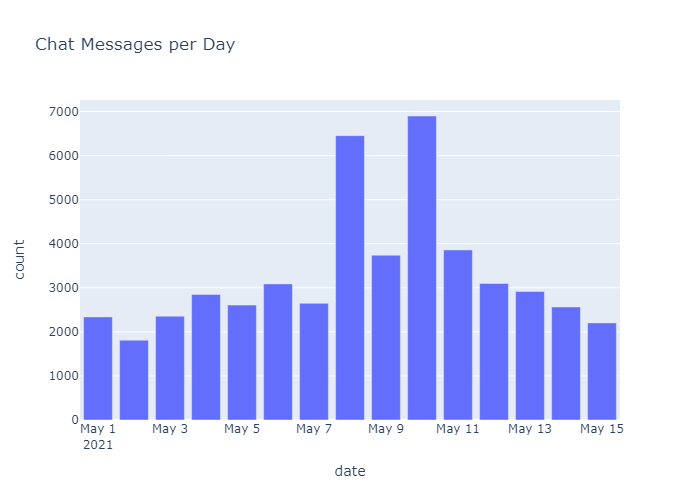

In [22]:
fig = px.bar(chat_df_grouped, x='date', y='count', title='Chat Messages per Day')
fig.show('png')